## Import the BCC data into a pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
bccdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin.data')
bccdf

,SampleCode,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Explore the data

In [ ]:
bccdf.dtypes

SampleCode                      int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
bccdf['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

## Initial Preprocessing Steps

In [ ]:
bccdf['Bare Nuclei'] != '?'

0      True
1      True
2      True
3      True
4      True
       ... 
694    True
695    True
696    True
697    True
698    True
Name: Bare Nuclei, Length: 699, dtype: bool

In [ ]:
bccdf = bccdf[bccdf['Bare Nuclei'] != '?']

In [ ]:
bccdf.shape

(683, 11)

In [ ]:
bccdf.dropna()

,SampleCode,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
bccdf = bccdf.drop(columns = ['SampleCode'])

In [ ]:
bccdf.Class.unique()

array([2, 4])

In [ ]:
bccdf.Class = (bccdf.Class - 2)/2

In [ ]:
bccdf.Class.unique()

array([0., 1.])

## Let's explore the data some more!

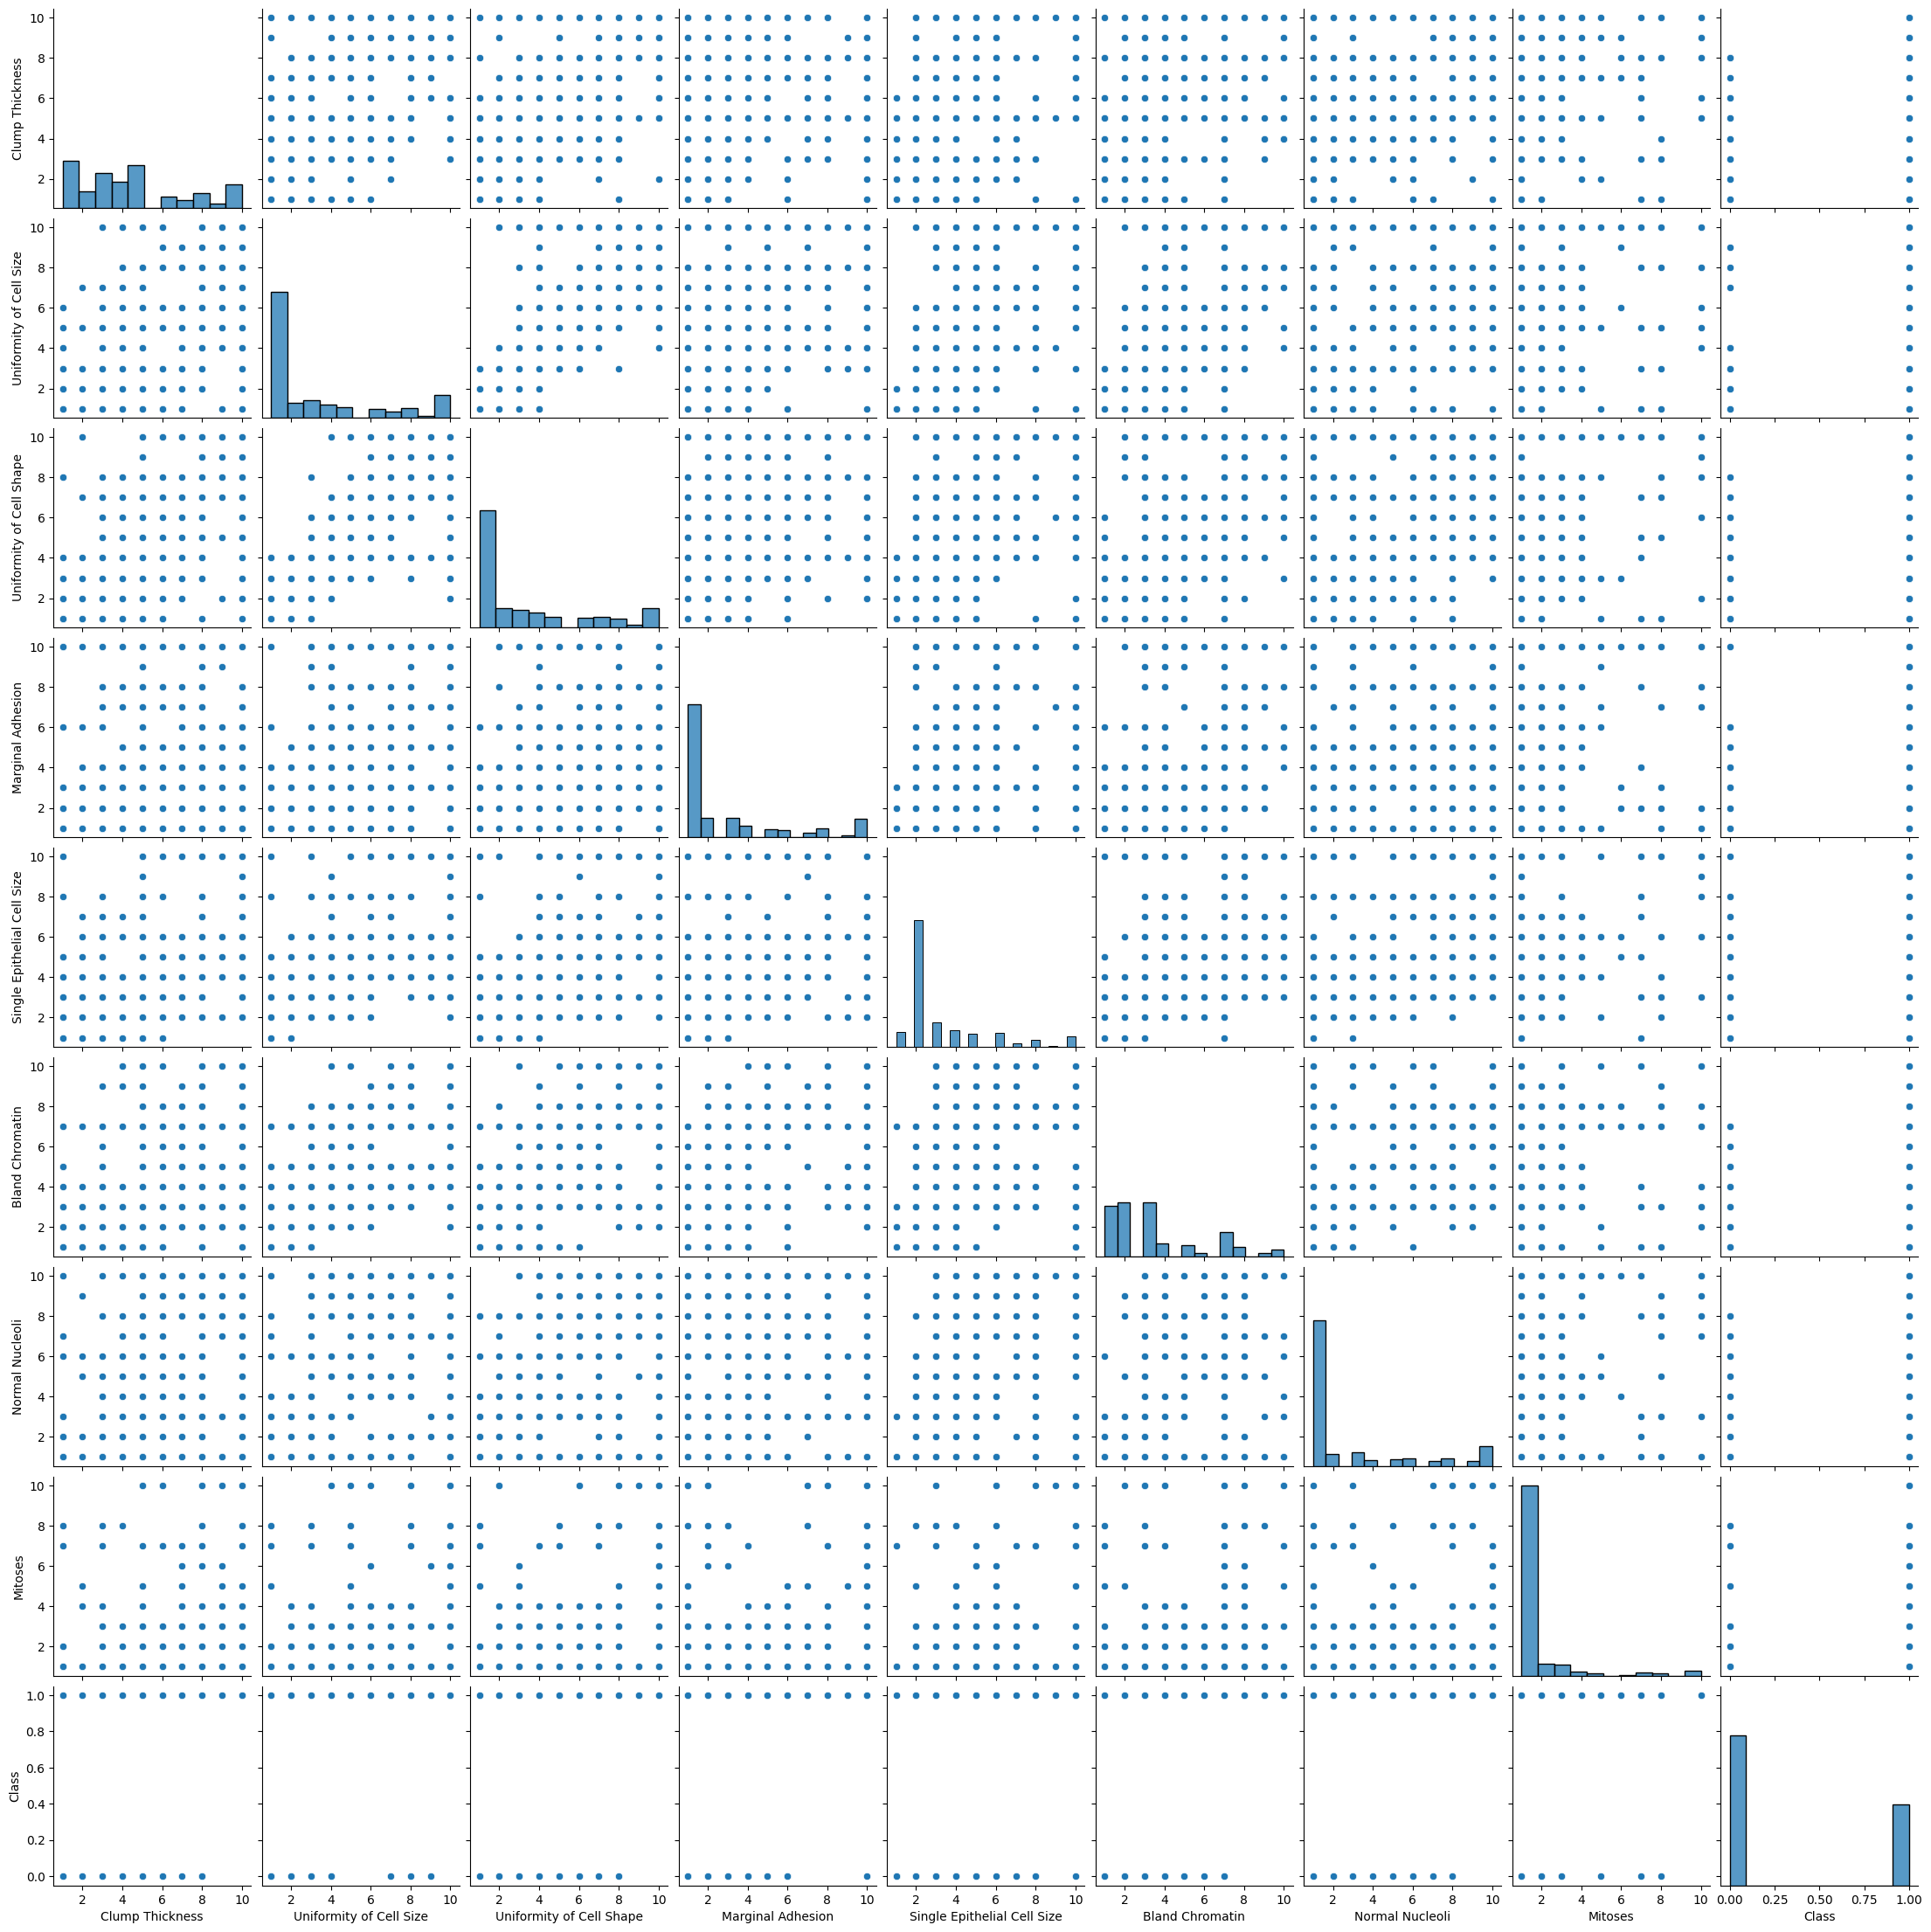

In [ ]:
sns.pairplot(bccdf)

In [ ]:
bccdf.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


<ipython-input-53-9bbb06db1eec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bccdf.corr()


<Axes: >

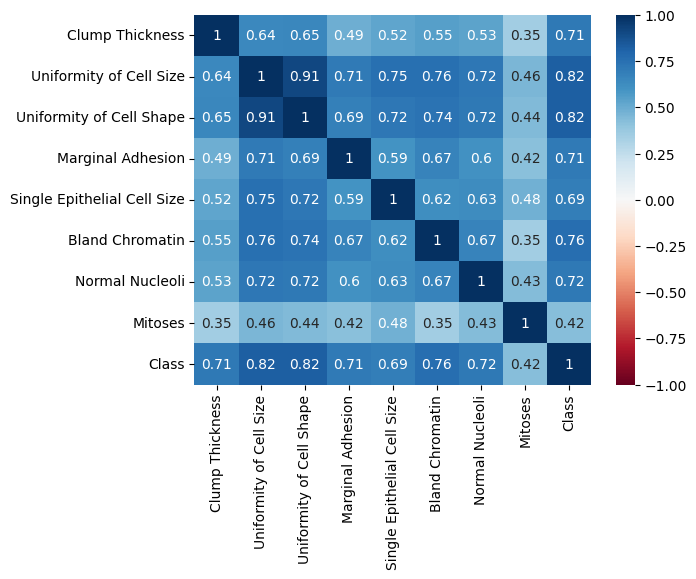

In [ ]:
corr = bccdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

## Data Splitting (More preprocessing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bccdf.drop(['Class'], axis=1), bccdf.Class, test_size=0.2, random_state=21)

In [1]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
y_train

115    0.0
59     1.0
111    1.0
609    0.0
446    0.0
      ... 
434    0.0
122    1.0
382    0.0
50     1.0
213    1.0
Name: Class, Length: 546, dtype: float64

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [ ]:
reg.coef_

array([0.03052106, 0.02897114, 0.01509576, 0.01302417, 0.00788995,
       0.04337238, 0.01392089, 0.01546489, 0.00422993])

In [ ]:
bccdf.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
regmodel.coef_

array([0.03052106, 0.02897114, 0.01509576, 0.01302417, 0.00788995,
       0.04337238, 0.01392089, 0.01546489, 0.00422993])

In [2]:
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)

NameError: name 'reg' is not defined

In [ ]:
yhat_train

array([ 1.09152000e-01,  4.68178713e-01,  7.63991922e-01,  5.77467447e-02,
       -6.43375130e-02, -1.98955633e-02,  1.06255011e-02,  9.91705443e-01,
        2.57212621e-02,  8.37950855e-02, -2.02251059e-02,  9.50848487e-01,
        1.01053402e-01,  4.11465656e-02, -5.97467806e-03, -3.64957425e-02,
        9.13980193e-01, -5.04166277e-02,  9.34650975e-01,  8.98867700e-01,
        1.01739902e+00, -3.64957425e-02,  5.93049584e-02, -4.43856904e-02,
       -5.97467806e-03,  4.11465656e-02,  8.37950855e-02, -3.38164485e-02,
        4.84555841e-02, -6.43375130e-02,  8.17500200e-01,  1.08055005e+00,
       -4.61866980e-02,  8.71325166e-02,  6.14685854e-03,  9.99224598e-01,
        9.02150016e-01,  1.11058974e+00,  8.74603834e-03, -2.02706078e-02,
        1.14316150e-01,  3.19199538e-01,  8.71325166e-02,  1.32502550e+00,
        2.27529566e-02,  1.02260124e+00, -5.04166277e-02,  1.12917152e+00,
        8.37833693e-01, -5.04166277e-02,  2.73555322e-03,  7.01177098e-02,
        8.86212185e-01,  

In [ ]:
display(min(yhat_train))
display(max(yhat_train))

-0.07222746088027807

1.4115936151750577

<Axes: >

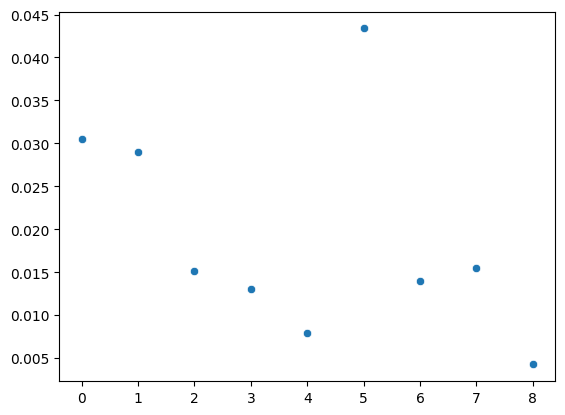

In [ ]:
sns.scatterplot(x = list(range(0,len(regmodel.coef_))), y = regmodel.coef_)

### Let's evaluate our error

In [ ]:
print('\nMean squared error: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nMean squared error: %.2f' % mean_squared_error(y_test, yhat_test))


Mean squared error: 0.04

Mean squared error: 0.04


### Since our y values are discreet we should discretize our yhat

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
yhat_test[0:20]

array([ 0.80896461,  0.72549656, -0.06433751,  0.12207456,  0.02722568,
       -0.0417064 ,  1.11774731,  0.92077138,  0.17385386,  0.8428757 ,
        0.07284251,  0.96521767,  0.12741097, -0.04438569,  0.0106255 ,
       -0.05830658,  0.00704949,  0.84968703,  0.00671995, -0.05041663])

In [ ]:
yhat_test2 = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test2[0:20]

[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
print(classification_report(y_test, yhat_test2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        84
         1.0       1.00      0.92      0.96        53

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train.head()

115    0.0
59     1.0
111    1.0
609    0.0
446    0.0
Name: Class, dtype: float64

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

In [ ]:
logreg.score(X_test, y_test)

0.9708029197080292

In [ ]:
logreg.score(X_train, y_train)

0.967032967032967

In [ ]:
yhat_test

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0.])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        84
         1.0       1.00      0.92      0.96        53

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



In [ ]:
logreg.coef_[0]

array([0.51189123, 0.07806344, 0.31837642, 0.33277616, 0.11420275,
       0.32199638, 0.4069301 , 0.16553989, 0.481485  ])

<Axes: >

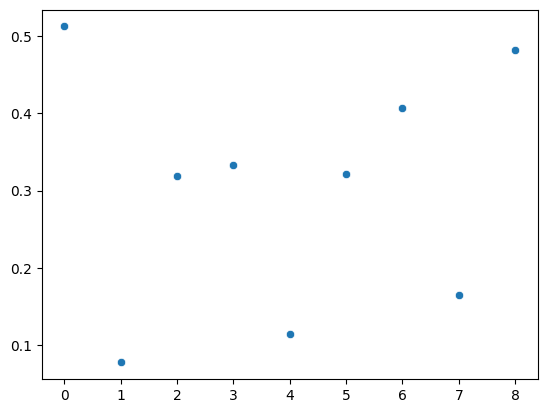

In [ ]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

In [ ]:
bccdf.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
X_train.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

## Neural Nets

Now I'm going to use Keras to define a Neural network that will be trained off of this data. This Neural Network can then be used to predict future values for breast cancer presence.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 9))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Once the Neural Network is defined, I now have to specify is the optimizer and loss function

In [ ]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.astype(float)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
115,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0
59,9.0,5.0,5.0,2.0,2.0,2.0,5.0,1.0,1.0
111,8.0,6.0,4.0,3.0,5.0,9.0,3.0,1.0,1.0
609,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
446,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
434,6.0,9.0,7.0,5.0,5.0,8.0,4.0,2.0,1.0
122,10.0,10.0,10.0,2.0,10.0,10.0,5.0,3.0,3.0
382,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0
50,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0


You now train the neural network using Classifier.fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The NN will then spot the patterns in the data, and build a neural network that could replicate that.

In [ ]:
history = classifier.fit(X_train.astype(float), y_train, batch_size = 1, epochs = 100)

Epoch 1/100
546/546 [==============================] - 1s 1ms/step - loss: 0.5156
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.2850
Epoch 3/100
546/546 [==============================] - 1s 3ms/step - loss: 0.2061
Epoch 4/100
546/546 [==============================] - 1s 2ms/step - loss: 0.1673
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.1568
Epoch 6/100
546/546 [==============================] - 1s 1ms/step - loss: 0.1376
Epoch 7/100
546/546 [==============================] - 1s 2ms/step - loss: 0.1393
Epoch 8/100
546/546 [==============================] - 1s 954us/step - loss: 0.1246
Epoch 9/100
546/546 [==============================] - 0s 893us/step - loss: 0.1179
Epoch 10/100
546/546 [==============================] - 1s 944us/step - loss: 0.1172
Epoch 11/100
546/546 [==============================] - 0s 906us/step - loss: 0.1174
Epoch 12/100
546/546 [==============================] - 0s 885us/step - loss: 0.1174
Epo

In [ ]:
history.history

dict_keys(['loss'])

To predict new values, the Neural Network uses classifier.predict. I'm going to pass it the test values for X (which the Neural Network hasn't previously seen) and it will give me back a set of predictions. These predicitons will be probabilities, so I will clean them up by saying that if thye are greater than .5, I'll make them 1, else I'll make them 0.

In [ ]:
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

5/5 [==============================] - 0s 2ms/step


array([[9.9816221e-01],
       [9.9632293e-01],
       [6.7637378e-04],
       [1.7416058e-02],
       [3.6972653e-04],
       [4.6651068e-04],
       [9.9364978e-01],
       [9.9992788e-01],
       [4.1244767e-04],
       [9.1336328e-01],
       [8.3156308e-04],
       [9.9996287e-01],
       [2.0968815e-02],
       [2.6755247e-04],
       [2.0592964e-04],
       [4.3623211e-04],
       [2.3120713e-04],
       [9.9966186e-01],
       [6.4940634e-04],
       [4.1074713e-04],
       [1.2948292e-03],
       [9.9999803e-01],
       [9.8998308e-01],
       [3.9712773e-04],
       [8.7580258e-01],
       [9.9989182e-01],
       [2.3829145e-04],
       [2.8301752e-01],
       [9.9999934e-01],
       [1.8679824e-04],
       [9.9999934e-01],
       [7.6832592e-01],
       [5.2410626e-01],
       [9.9184823e-01],
       [2.5484577e-04],
       [4.5627338e-01],
       [1.5509814e-04],
       [1.1196818e-03],
       [1.5954359e-03],
       [4.4817079e-04],
       [9.9999428e-01],
       [9.994798

In [ ]:
yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test

[1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        84
         1.0       0.98      0.89      0.93        53

    accuracy                           0.95       137
   macro avg       0.96      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
yy_test = y_test.astype(int).reset_index(drop = True)
yy_test

0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    0
134    0
135    1
136    0
Name: Class, Length: 137, dtype: int64

In [ ]:
pd.Series(yhat_test)

0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    0
134    0
135    1
136    1
Length: 137, dtype: int64

In [ ]:
for i in (0,1):
    for j in (0,1):
        myval = int((i and j) or (not (i or j)))
        print(str(i) + ' xnor ' + str(j) + ' = ' + str(myval))

0 xnor 0 = 1
0 xnor 1 = 0
1 xnor 0 = 0
1 xnor 1 = 1


In [ ]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [ ]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf

,yhat_test,y_test
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
132,0,0
133,0,0
134,0,0
135,1,1


In [ ]:
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

,yhat_test,y_test,correct
0,1,1,1
1,1,1,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
132,0,0,1
133,0,0,1
134,0,0,1
135,1,1,1


In [ ]:
testdf.correct.sum()

132

Now we can loop through the set of predicitons for the test set (called Y_pred) and the actual values for the test set (celled Y_test), and see how alike they are -- if they are the same, I'll increment 'correct', otherwise I'll incrememnt 'wrong'.

You'll see the result is 100% accurate, even though the neural network reported a lower accuracy than that. Why?

In [ ]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))

Total 137
Correct 132
Wrong 5


In [ ]:
((yhat_test - y_test)**2).sum()

5.0

In [ ]:
y_test.shape[0] - ((yhat_test - y_test)**2).sum()

132.0

In [ ]:
(y_test.shape[0] - ((yhat_test - y_test)**2).sum())/y_test.shape[0]

0.9635036496350365

In [ ]:
classifier.layers[3].weights

[<tf.Variable 'dense_3/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-0.6647107],
        [-1.3802075],
        [-1.131521 ],
        [-1.5327429],
        [-0.7652483],
        [ 1.1751894]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([2.079124], dtype=float32)>]

## Naive Bayesian Classification

[Naive Bayes Docs](https://scikit-learn.org/stable/modules/naive_bayes.html)<br>
[Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()

In [ ]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
115,1,1,1,1,2,5,1,1,1
59,9,5,5,2,2,2,5,1,1
111,8,6,4,3,5,9,3,1,1
609,5,1,1,1,2,1,1,1,1
446,1,1,1,1,2,1,1,1,1


In [ ]:
y_train.head()

115    0.0
59     1.0
111    1.0
609    0.0
446    0.0
Name: Class, dtype: float64

In [ ]:
model.fit(X_train, y_train)

CategoricalNB()

In [ ]:
yhat_test = model.predict(X_test)

In [ ]:
yhat_test

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1.])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test, labels=model.classes_)
display(myconfusionmatrix)

array([[83,  1],
       [ 1, 52]])

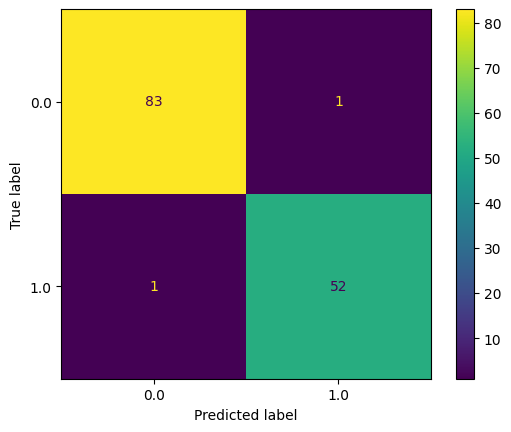

In [ ]:
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=model.classes_)
mycmdisp.plot()

In [ ]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        84
         1.0       0.98      0.98      0.98        53

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



In [ ]:
model.score(X_test,y_test)

0.9854014598540146

[Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize = True) # Make sure you binarize if you haven't made your values binary

In [ ]:
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
display(yhat_test)

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1.])

array([[79,  5],
       [ 2, 51]])

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        84
         1.0       0.91      0.96      0.94        53

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



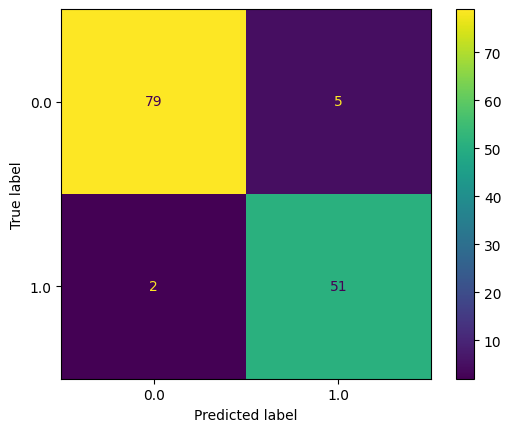

In [ ]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test, labels=model.classes_)
display(myconfusionmatrix)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=model.classes_)
mycmdisp.plot()
# Let's print our classification report
print(classification_report(y_test, yhat_test))

[Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
display(yhat_test)

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1.])

array([[83,  1],
       [ 2, 51]])

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        84
         1.0       0.98      0.96      0.97        53

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



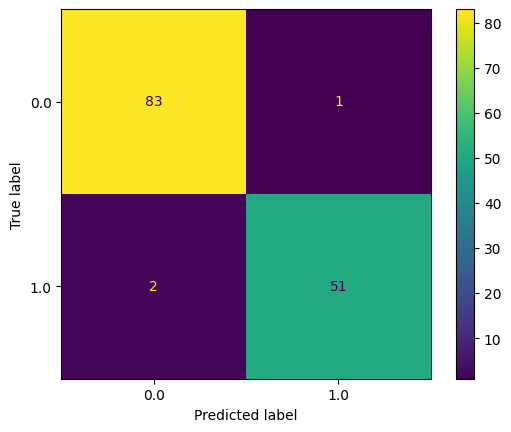

In [ ]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test, labels=model.classes_)
display(myconfusionmatrix)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=model.classes_)
mycmdisp.plot()
# Let's print our classification report
print(classification_report(y_test, yhat_test))

[Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
display(yhat_test)

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1.])

array([[81,  3],
       [10, 43]])

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93        84
         1.0       0.93      0.81      0.87        53

    accuracy                           0.91       137
   macro avg       0.91      0.89      0.90       137
weighted avg       0.91      0.91      0.90       137



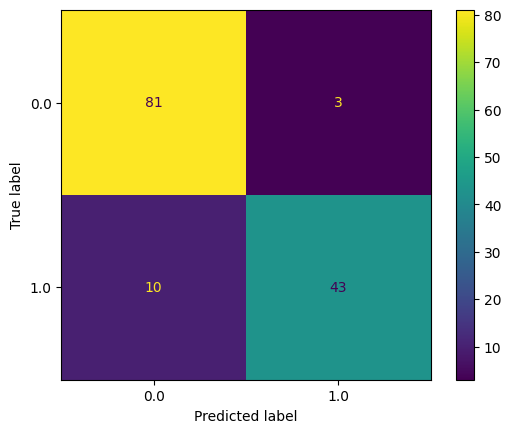

In [ ]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test, labels=model.classes_)
display(myconfusionmatrix)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=model.classes_)
mycmdisp.plot()
# Let's print our classification report
print(classification_report(y_test, yhat_test))